In [1]:
# Import dependencies 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
from datetime import datetime

In [2]:
# Import csv files and dependencies 
cab_prices_file = "uber_lyft_data/cab_rides.csv"
weather_file = "uber_lyft_data/weather.csv"

cab_prices = pd.read_csv(cab_prices_file)
weather_file = pd.read_csv(weather_file)

cab_prices_df = pd.DataFrame(cab_prices)
weather_df = pd.DataFrame(weather_file)

In [3]:
# Clean up the dataframe
# Dropping all NaN values
# Renaming the columns 
# Converting time_stamp to date format 

clean_prices = cab_prices_df.dropna(how='any')
clean_prices_df = pd.DataFrame(clean_prices)
clean_prices_df.head()

clean_prices_rename = clean_prices_df.rename(columns={"distance": "Distance", "cab_type": "Type of Cab", 
                                                     "time_stamp":"Date", "source":"Source", 
                                                     "price":"Price", "surge_multiplier":"Surge Multiplier",
                                                     "id":"User ID", "product_id":"Service Type", "name":"Vehicle Type"})

clean_prices_rename_df = pd.DataFrame(clean_prices_rename)

clean_prices_rename_df['Date'] = pd.to_datetime(clean_prices_rename_df['Date']/1000, unit='s')
clean_prices_rename_df.head()

,Distance,Type of Cab,Date,destination,Source,Price,Surge Multiplier,User ID,Service Type,Vehicle Type
0,0.44,Lyft,2018-12-16 09:30:07.890000105,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23.677000046,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-11-28 01:00:22.197999954,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-11-30 04:53:02.749000072,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-11-29 03:49:20.223000050,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
# Clean up the dataframe
# Dropping all NaN values
# Renaming the columns 
# Converting time_stamp to date format 

clean_weather = weather_df.dropna(how='any')
clean_weather_df = pd.DataFrame(clean_weather)

clean_weather_rename = clean_weather_df.rename(columns={'temp':'Temperature in Fahrenheit', 'location':'Location',
                                                       'clouds':'Cloudiness', 'pressure':'Pressure', 'rain':'Rainfall in inches',
                                                       'time_stamp':'Date', 'humidity':'Humidity', 'wind':'Wind Speed'})

clean_weather_rename_df = pd.DataFrame(clean_weather_rename)

clean_weather_rename_df['Date'] = pd.to_datetime(clean_weather_rename_df['Date'], unit='s')
clean_weather_rename_df.head()

,Temperature in Fahrenheit,Location,Cloudiness,Pressure,Rainfall in inches,Date,Humidity,Wind Speed
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49


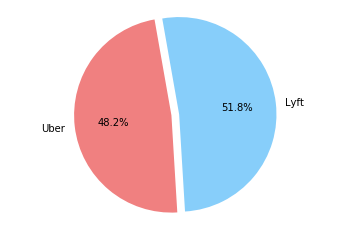

In [5]:
# Uber vs Lyft Usage Comparison in pie chart 
cab_counts = [clean_prices_df.cab_type[(clean_prices_df.cab_type) == 'Lyft'].count(), 
              clean_prices_df.cab_type[(clean_prices_df.cab_type) == 'Uber'].count()]

explode = (0.08, 0)

cab_types = ['Uber','Lyft']

colors = ["lightcoral", "lightskyblue"]

plt.pie(cab_counts, explode=explode, labels=cab_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=100)

plt.axis("equal")
plt.savefig("uber_vs_lyft_usage_comparison.png")
plt.show()

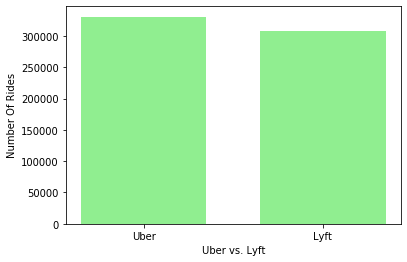

In [6]:
# bar chart for comparing uber and lyft rides
labels_x = ['Uber','Lyft']
counts_y = [clean_prices_df.cab_type[(clean_prices_df.cab_type) == 'Uber'].count(), 
            clean_prices_df.cab_type[(clean_prices_df.cab_type)=='Lyft'].count()]

plt.bar(labels_x, counts_y, color="lightgreen", align="center", width = 0.7)

plt.xlabel("Uber vs. Lyft")
plt.ylabel("Number Of Rides")
plt.savefig("uber_vs_lyft_number_of_rides.png")
plt.show()

In [7]:
# Getting total number of services by uber and lyft 
service_count = clean_prices_df["name"].value_counts()
service_count

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lyft XL         51235
Lyft            51235
Lux Black       51235
Lux Black XL    51235
Lux             51235
Shared          51233
Name: name, dtype: int64

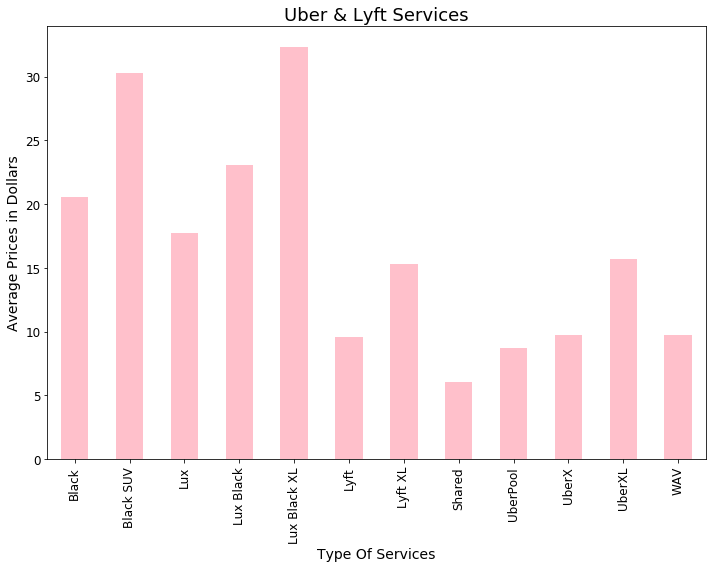

In [8]:
# Uber vs Lyft Price Comparison bar chart

average_price = clean_prices_df.groupby('name')['price'].mean()

bar_chart_price = average_price.plot.bar(x="name", y="price",
                                        color="pink", figsize=(10,8), fontsize= 12)
bar_chart_price

plt.title("Uber & Lyft Services", fontsize = 18)
plt.xlabel("Type Of Services", fontsize = 14)
plt.ylabel("Average Prices in Dollars", fontsize = 14)
plt.tight_layout()
plt.savefig("uber_vs_lyft_avg_price_comparison_by_service_type.png")
plt.show()

In [9]:
# merge the datasets to refelect same time for a location, Source, and Date in both two data
clean_prices_rename_df['merge_date'] = clean_prices_rename_df.Source.astype(str) +" - "+ clean_prices_rename_df.Date.dt.date.astype("str") +" - "+ clean_prices_rename_df.Date.dt.hour.astype("str")
clean_weather_rename_df['merge_date'] = clean_weather_rename_df.Location.astype(str) +" - "+ clean_weather_rename_df.Date.dt.date.astype("str") +" - "+ clean_weather_rename_df.Date.dt.hour.astype("str")

In [10]:
# join two data structure 
clean_weather_rename_df.index = clean_weather_rename_df['merge_date']

merged_df = clean_prices_rename_df.join(clean_weather_rename_df, on = ['merge_date'], rsuffix ='_w')
merged_df

,Distance,Type of Cab,Date,destination,Source,Price,Surge Multiplier,User ID,Service Type,Vehicle Type,merge_date,Temperature in Fahrenheit,Location,Cloudiness,Pressure,Rainfall in inches,Date_w,Humidity,Wind Speed,merge_date_w
0,0.44,Lyft,2018-12-16 09:30:07.890000105,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,Haymarket Square - 2018-12-16 - 9,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,0.44,Lyft,2018-11-27 02:00:23.677000046,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Haymarket Square - 2018-11-27 - 2,44.31,Haymarket Square,1.00,1003.17,0.1123,2018-11-27 02:15:20,0.90,13.69,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,2018-11-27 02:00:23.677000046,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Haymarket Square - 2018-11-27 - 2,43.82,Haymarket Square,0.99,1002.59,0.0997,2018-11-27 02:45:20,0.89,11.57,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,2018-11-28 01:00:22.197999954,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,0.44,Lyft,2018-11-30 04:53:02.749000072,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,Haymarket Square - 2018-11-30 - 4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,2018-12-01 23:53:05.533999919,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,West End - 2018-12-01 - 23,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
693066,1.00,Uber,2018-12-01 23:53:05.533999919,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,West End - 2018-12-01 - 23,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
693067,1.00,Uber,2018-12-01 23:53:05.533999919,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,West End - 2018-12-01 - 23,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
693069,1.00,Uber,2018-12-01 23:53:05.533999919,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,West End - 2018-12-01 - 23,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [11]:
# show an info for total number of indexes. 
# it added extra data in the weather data, so index number increased to 719,135.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719135 entries, 0 to 693070
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Distance                   719135 non-null  float64       
 1   Type of Cab                719135 non-null  object        
 2   Date                       719135 non-null  datetime64[ns]
 3   destination                719135 non-null  object        
 4   Source                     719135 non-null  object        
 5   Price                      719135 non-null  float64       
 6   Surge Multiplier           719135 non-null  float64       
 7   User ID                    719135 non-null  object        
 8   Service Type               719135 non-null  object        
 9   Vehicle Type               719135 non-null  object        
 10  merge_date                 719135 non-null  object        
 11  Temperature in Fahrenheit  190311 non-null  float64 

In [12]:
# show the value counts of the id, in order to see total number of the id  
merged_df['User ID'].value_counts()

820de241-114e-4a9c-ab52-5875ce253306    8
0f56481f-8647-4a05-9db1-09fb72011d0e    8
9f253c57-6d7c-4d3e-99e6-4dedf4bcac5f    8
9e0ec1f5-3780-487b-b9c0-e5464a6ab4cb    8
28901a28-8d35-4d80-ac3c-6fab9651a230    8
                                       ..
15cd7dde-c853-45d0-8ec3-c9b6c0be701a    1
5b7db923-0d04-4fbf-89f1-76430ef89dc3    1
d94bbe82-cbf2-4c38-bc53-4335e4fcb619    1
ad7bc2ae-1be6-4b82-b0b1-cf174fe26233    1
70057ede-a33f-4281-bf29-77a74e752732    1
Name: User ID, Length: 637976, dtype: int64

In [13]:
merged_df[merged_df['User ID'] == '81ffc3d0-b1e4-4f08-bfdd-b4b79035f9c9'].iloc[:, 10:20]

,merge_date,Temperature in Fahrenheit,Location,Cloudiness,Pressure,Rainfall in inches,Date_w,Humidity,Wind Speed,merge_date_w
686386,Boston University - 2018-11-27 - 0,43.98,Boston University,1.00,1006.25,0.0272,2018-11-27 00:17:14,0.90,9.63,Boston University - 2018-11-27 - 0
686386,Boston University - 2018-11-27 - 0,43.89,Boston University,0.98,1005.89,0.2112,2018-11-27 00:42:13,0.91,10.64,Boston University - 2018-11-27 - 0
686386,Boston University - 2018-11-27 - 0,43.79,Boston University,0.99,1006.08,0.1622,2018-11-27 00:45:21,0.91,9.59,Boston University - 2018-11-27 - 0
686386,Boston University - 2018-11-27 - 0,43.88,Boston University,0.98,1005.88,0.2072,2018-11-27 00:42:27,0.91,10.66,Boston University - 2018-11-27 - 0
686386,Boston University - 2018-11-27 - 0,43.98,Boston University,1.00,1006.35,0.0318,2018-11-27 00:12:13,0.90,9.31,Boston University - 2018-11-27 - 0
686386,Boston University - 2018-11-27 - 0,43.88,Boston University,0.98,1005.85,0.1887,2018-11-27 00:43:37,0.91,10.73,Boston University - 2018-11-27 - 0
686386,Boston University - 2018-11-27 - 0,43.99,Boston University,0.98,1005.93,0.1662,2018-11-27 00:58:48,0.90,9.82,Boston University - 2018-11-27 - 0
686386,Boston University - 2018-11-27 - 0,43.99,Boston University,0.98,1005.92,0.1675,2018-11-27 00:59:13,0.90,9.84,Boston University - 2018-11-27 - 0


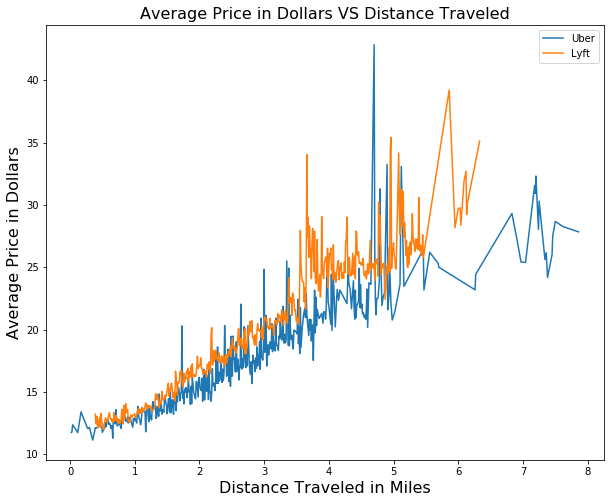

In [14]:
# Average Price Vs Distance traveled

# Collect Uber and Lyft in the data 
uber_df = merged_df[merged_df['Type of Cab'] == 'Uber']
lyft_df = merged_df[merged_df['Type of Cab'] == 'Lyft']

# Find the averages in Uber and Lyft prices 
uber_avgprice = uber_df.groupby('Distance')['Price'].mean()
lyft_avgprice = lyft_df.groupby('Distance')['Price'].mean()

# Plot the charts and apply some styling
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.plot(uber_avgprice, label='Uber')
plt.plot(lyft_avgprice, label='Lyft')

plt.title('Average Price in Dollars VS Distance Traveled', fontsize=16)
plt.xlabel('Distance Traveled in Miles', fontsize=16)
plt.ylabel('Average Price in Dollars', fontsize=16)
plt.legend()
plt.savefig('Average_Price_vs_Distance_Traveled')
plt.show()

In [15]:
# merged_df.groupby('Wind Speed')['Temperature in Fahrenheit'].value_counts()

In [16]:
# Uber & Lyft rides vs Weather(temp in fahrenheit)

# temperature = merged_df.groupby('Wind Speed')['Temperature in Fahrenheit'].value_counts()

# bar_chart_temp = merged_df.plot.bar(x="Wind Speed", y="Type of Cab", 
#                                     color="lightgreen", fontsize= 12)
# bar_chart_temp

# plt.title("Uber & Lyft Rides vs Average Temperature in F", fontsize = 18)
# plt.xlabel("Uber & Lyft Rides", fontsize = 14)
# plt.ylabel("Average Temperature in F", fontsize = 14)
# plt.tight_layout()
# # plt.savefig("uber_&_lyft_rides_VS_avg_temp_comparison.png")
# plt.show()